In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [12]:
df = pd.read_csv('E:\\data Science\\datasets\\winequality-red.csv')

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.shape

(1599, 12)

In [15]:
df.quality.value_counts()
# we can clearly see that most quality values are 5&6

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

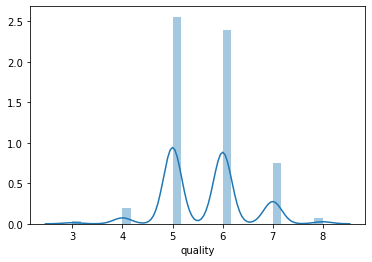

In [16]:
sns.distplot(df['quality'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
# we have converted all quality values in 5 and 6
df['quality'] = np.where(df.quality<=5,5,6)

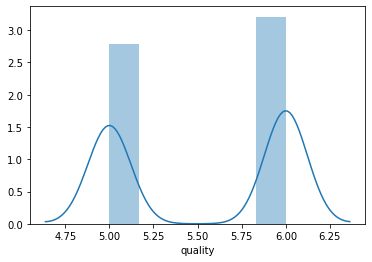

In [19]:
sns.distplot(df['quality'])

In [20]:
x = df.drop(['quality'],axis = 1)

In [21]:
y = df.loc[:,'quality']

In [22]:
y.value_counts()

6    855
5    744
Name: quality, dtype: int64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3,random_state = 1234)

In [24]:
# to make the scale equal from features
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [25]:
model = KNeighborsClassifier(n_neighbors= 5)

In [26]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
y_pred = model.predict(x_test)

In [28]:
print(accuracy_score(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

0.74375


[[154  70]
 [ 53 203]]


              precision    recall  f1-score   support

           5       0.74      0.69      0.71       224
           6       0.74      0.79      0.77       256

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480



In [ ]:
####### to find the best value of K ##############

In [29]:
error_rate = []
for i in range (1,100):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN.fit(x_train,y_train)
    KNN_pred = KNN.predict(x_test)
    error_rate.append(np.mean(KNN_pred != y_test))

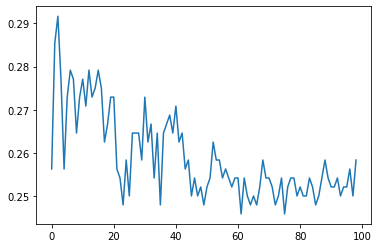

In [30]:
plt.plot(error_rate)

In [ ]:
# lets select k = 76

In [47]:
model1 = KNeighborsClassifier(n_neighbors =76)

In [48]:
model1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=76, p=2,
                     weights='uniform')

In [49]:
model1_pred = model1.predict(x_test)

In [50]:
print(accuracy_score(y_test,model1_pred))
print('\n')
print(confusion_matrix(y_test,model1_pred))
print('\n')
print(classification_report(y_test,model1_pred))

0.7541666666666667


[[161  63]
 [ 55 201]]


              precision    recall  f1-score   support

           5       0.75      0.72      0.73       224
           6       0.76      0.79      0.77       256

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480

